
Q2. Cement Strength Regression

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA.

a. Use Linear, Ridge, and Lasso Regression.

b. Show results of the best model (least test data mean squared error) using a loop to compare the values.

c. Create any neural network you feel like making (RNN, CNN, ANN, or any other) and achieve a test data mean squared error lesser than the best model in part b.

Data: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [17]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


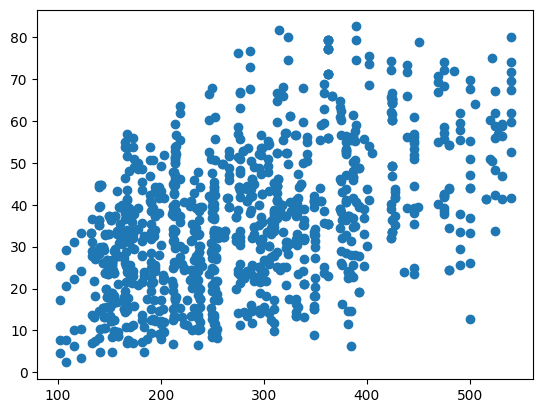

In [32]:
plt.scatter(df['Cement'],df['Strength'])
plt.show()

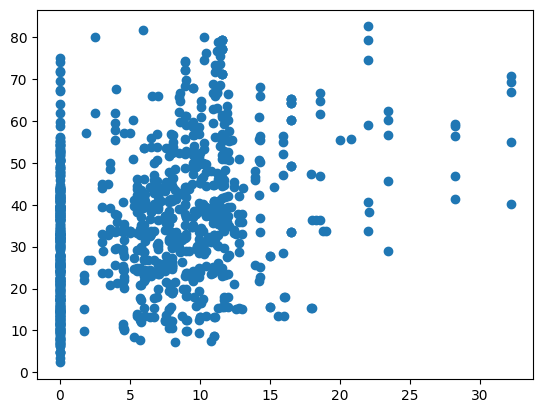

In [33]:
plt.scatter(df['Superplasticizer'],df['Strength'])
plt.show()

In [2]:
x=df.drop(['Strength'],axis=1)
y=df['Strength']

In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [7]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(x,y)
y_pred=reg.predict(x_test)
y_pred

array([58.27098441, 51.55420294, 63.11111045, 51.09731466, 17.48160858,
       39.89433852, 26.44050879, 45.12487734, 29.71113324, 38.12097301,
       27.70076258, 19.37348133, 66.50488583, 51.45065001, 30.92652655,
       43.37752981, 29.76750647, 25.95501031, 31.91664222, 32.38002589,
       36.33541864, 32.30642486, 38.40936852, 24.10239105, 33.90450701,
       34.25133287, 14.23760183, 40.11216061, 42.99909869, 21.36731358,
       36.44089105, 31.03920478, 42.67496834, 46.50922274, 31.11016391,
       29.17084451, 29.28566963, 38.97069667, 19.10804093, 39.28575728,
       21.31866216, 14.55581625, 30.07209741, 51.24176024, 20.93861185,
       57.00148191, 51.94616413, 60.10753816, 19.72596433, 18.13961962,
       39.69715033, 35.46043555, 30.24441718, 32.48794323, 47.75888326,
       50.94771229, 28.11202428, 15.84714556, 30.43507628, 18.2176771 ,
       38.75524826, 20.43717333, 32.01815248, 55.31952958, 22.18124856,
       22.26737431, 31.86954317, 17.0955664 , 25.40330308, 26.29

In [21]:
from sklearn.metrics import r2_score

accuracy=r2_score(y_test,y_pred)
accuracy*100

64.55942002057358

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold,cross_val_score
from numpy import mean,std,absolute

model = Ridge(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 8.285 (0.625)


In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

91.32218583531912

In [25]:
model.fit(x,y)
model.predict(x_test)

array([58.27095115, 51.55416704, 63.11093548, 51.09727884, 17.48160615,
       39.89437621, 26.44053824, 45.1248514 , 29.71109547, 38.12105632,
       27.70068472, 19.37354607, 66.50457143, 51.45059302, 30.9266069 ,
       43.37766482, 29.76750901, 25.95504799, 31.91655188, 32.38002875,
       36.33550154, 32.30660029, 38.40935818, 24.10242976, 33.90453756,
       34.25126579, 14.23759785, 40.11212157, 42.99907304, 21.36735894,
       36.44095072, 31.03928927, 42.6750336 , 46.50919956, 31.11016995,
       29.17084175, 29.28566507, 38.97068831, 19.10811591, 39.28571356,
       21.31868447, 14.5558873 , 30.07214164, 51.24171611, 20.93857922,
       57.00146791, 51.94605686, 60.1075831 , 19.7259702 , 18.1396436 ,
       39.69719118, 35.46050593, 30.24441638, 32.48802575, 47.75896927,
       50.9476993 , 28.11198678, 15.84714064, 30.43500676, 18.21766854,
       38.75524726, 20.43728496, 32.018118  , 55.31939539, 22.18127125,
       22.26726331, 31.8695369 , 17.09551146, 25.40327957, 26.29

Convolutional Neural Networks (CNN)

In [50]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Create a neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(x_train, y_train, epochs=120, batch_size=32, verbose=1)

# Evaluate the model on the test set
nn_preds = nn_model.predict(x_test)
nn_mse = mean_squared_error(y_test, nn_preds)

print("Neural Network MSE:", nn_mse)


Epoch 1/120
26/26 [==============================] - 2s 4ms/step - loss: 13166.7939
Epoch 2/120
26/26 [==============================] - 0s 3ms/step - loss: 1620.8412
Epoch 3/120
26/26 [==============================] - 0s 3ms/step - loss: 684.1332
Epoch 4/120
26/26 [==============================] - 0s 3ms/step - loss: 248.8521
Epoch 5/120
26/26 [==============================] - 0s 3ms/step - loss: 137.8944
Epoch 6/120
26/26 [==============================] - 0s 5ms/step - loss: 110.3568
Epoch 7/120
26/26 [==============================] - 0s 5ms/step - loss: 105.8262
Epoch 8/120
26/26 [==============================] - 0s 4ms/step - loss: 100.9023
Epoch 9/120
26/26 [==============================] - 0s 4ms/step - loss: 99.1123
Epoch 10/120
26/26 [==============================] - 0s 5ms/step - loss: 95.1096
Epoch 11/120
26/26 [==============================] - 0s 4ms/step - loss: 97.4074
Epoch 12/120
26/26 [==============================] - 0s 4ms/step - loss: 93.9086
Epoch 13/120
2